# Import Libraries


In [200]:
from qiskit import QuantumCircuit, Aer
from qiskit.visualization import plot_histogram

# Create a quantum circuit


In [201]:
circuit = QuantumCircuit(3)

# Apply series of gates


In [202]:
circuit.h(0)
circuit.cx(0, 1)
circuit.h(2)

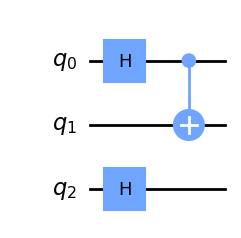

In [203]:
circuit.draw("mpl")

In [204]:
circuit.cx(2, 1)
circuit.x(2)
circuit.cx(2, 0)
circuit.x(2)

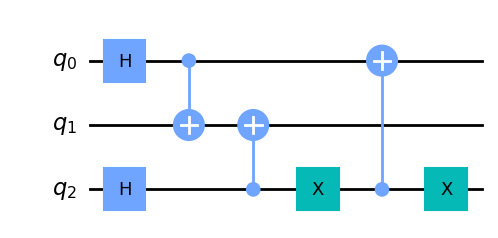

In [205]:
circuit.draw("mpl")

In [206]:
circuit.swap(0, 1)
circuit.x(0)
circuit.x(1)

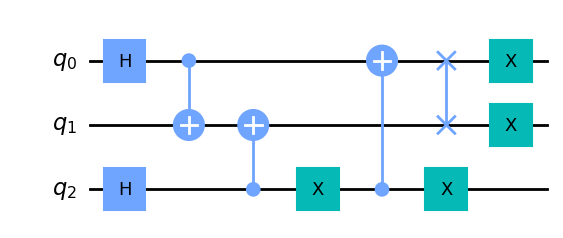

In [207]:
circuit.draw("mpl")

In [208]:
circuit.cx(2, 1)
circuit.x(2)
circuit.cx(2, 0)
circuit.x(2)

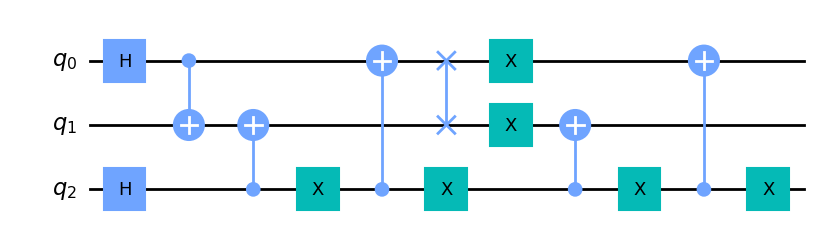

In [209]:
circuit.draw("mpl")

# Simulate the circuit


In [210]:
backend = Aer.get_backend("statevector_simulator")

In [211]:
job = backend.run(circuit)

In [212]:
result = job.result()

In [213]:
output_state = result.get_statevector(circuit, decimals=3)

In [214]:
output_state

Statevector([0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j, 0.5+0.j, 0. +0.j, 0. +0.j,
             0.5+0.j],
            dims=(2, 2, 2))


# Display the results


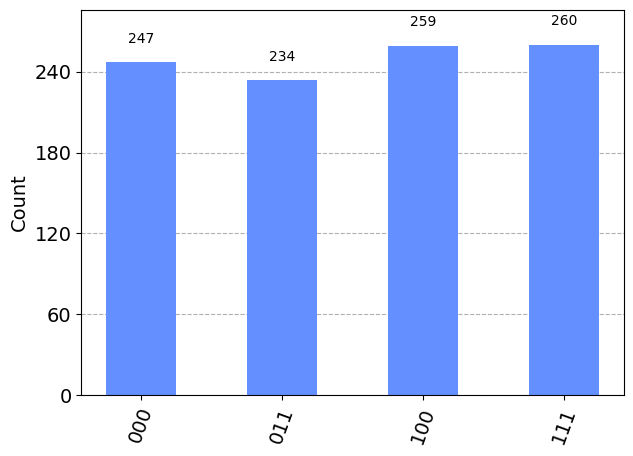

In [215]:
measure_circuit = QuantumCircuit(3, 3)
measure_circuit.measure([0, 1, 2], [0, 1, 2])

backend = Aer.get_backend("qasm_simulator")
circuit = circuit.compose(measure_circuit)
result = backend.run(circuit, shots=1000).result()
count = result.get_counts(circuit)
plot_histogram(count)